In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns


import random

import pandas as pd 
import os 
from tqdm import tqdm 

import cv2 
from PIL import Image

import tensorflow as tf 
from tensorflow.keras import models, layers 

train_depth_left = "../Datasets/stereo/data_scene_flow/training/disp_occ_0"
train_depth_right = "../Datasets/stereo/data_scene_flow/training/disp_occ_1"
train_img_left = "../Datasets/stereo/data_scene_flow/training/image_2"
train_img_right = "../Datasets/stereo/data_scene_flow/training/image_3"

test_img_left = "../Datasets/stereo/data_scene_flow/testing/image_2"
test_img_right = "../Datasets/stereo/data_scene_flow/testing/image_3"

train_paths = [train_depth_left, train_depth_right, train_img_left, train_img_right]
test_paths = [None, None, test_img_left, test_img_right]

In [17]:
ds = len(os.listdir(train_depth_right))
indices = random.sample(range(0, ds), 32)
# max(indices)
sns.countplot(indices)

191

In [22]:
class DataLoader:

    def __init__(self, data_paths, shuffle = True, batch_size = 32, d_type="training", test_split = 0.2):
        self.depth_left, self.depth_right, self.img_left, self.img_right = data_paths  
        self.shuffle = shuffle 
        self.batch_size = batch_size 
        self.d_type = d_type
        self.test_split = 0.2 
        self.data = {
            "depth_left": [], 
            "depth_right": [], 
            "img_left": [], 
            "img_right": [] 
        }
        self.data_paths = os.listdir(self.depth_right)
        self.data_size = len(self.data_paths)

    def getLens(self):
        for c in list(self.data.keys()):
            print(c, ":", len(self.data[c]))

    def load_paths(self):

        if self.d_type == "training": 
            self.data["img_left"] = [os.path.join(self.img_left, i) for i in tqdm(self.data_paths, desc="Loading Stereo Left Training Images", ncols=100)]
            self.data["depth_left"] = [os.path.join(self.depth_left, i) for i in tqdm(self.data_paths, desc="Loading Stereo Left Training Depths", ncols=100)] 
            self.data["img_right"] = [os.path.join(self.img_right, i) for i in tqdm(self.data_paths, desc="Loading Stereo Right Training Images", ncols=100)]
            self.data["depth_right"] = [os.path.join(self.depth_right, i) for i in tqdm(self.data_paths, desc="Loading Stereo Right Training Depths", ncols=100)]  

        else:
            self.data["img_left"] = [os.path.join(self.img_left, i) for i in tqdm(self.data_paths, desc="Loading Stereo Left Test Images", ncols=100)]
            self.data["img_right"] = [os.path.join(self.img_right, i) for i in tqdm(self.data_paths, desc="Loading Stereo Right Test Images", ncols=100)]

    def load_img(self, img_path):
        img = tf.io.read_file(img_path)
        img = tf.image.decode_png(img, channels=3) 
        return img 

    def getBatch(self):

        indices = random.sample(range(0, self.data_size), self.batch_size) 

        data = {
            "img_left": tf.data.Dataset.from_tensor_slices([self.data["img_left"][i] for i in indices]).map(lambda x : self.load_img(x)), 
            "img_right": tf.data.Dataset.from_tensor_slices([self.data["img_right"][i] for i in indices]).map(lambda x : self.load_img(x)), 
            "depth_left": tf.data.Dataset.from_tensor_slices([self.data["depth_left"][i] for i in indices]).map(lambda x : self.load_img(x)), 
            "depth_right": tf.data.Dataset.from_tensor_slices([self.data["depth_right"][i] for i in indices]).map(lambda x : self.load_img(x))
        }            
        return data 

In [23]:
datagen = DataLoader(train_paths)
datagen.load_paths() 

Loading Stereo Right Training Depths: 100%|███████████████████| 200/200 [00:00<00:00, 848190.90it/s]


In [24]:
datagen.getLens()

depth_left : 200
depth_right : 200
img_left : 200
img_right : 200


In [25]:
batch = datagen.getBatch()

In [30]:
it

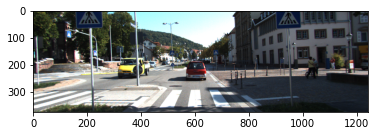

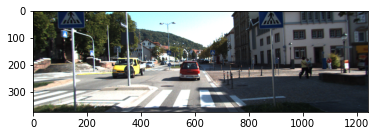

In [50]:
# it_il = iter(batch["img_left"])
# it_ir = iter(batch["img_right"])
plt.imshow(it_il.next())
plt.show()
plt.imshow(it_ir.next())
plt.show()

In [ ]:
#Rough Work Below

In [2]:
a = [1, 2, 3, 4, 5]
a[[4, 3, 2]]

TypeError: list indices must be integers or slices, not list

In [33]:
left = os.listdir(train_depth_left)
right = os.listdir(train_depth_right)

In [37]:
i1 = plt.imread(train_depth_left + "/" + left[1])
i2 = plt.imread(train_depth_right + "/" + right[1])

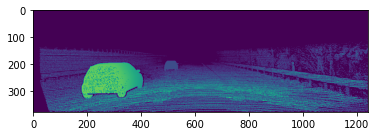

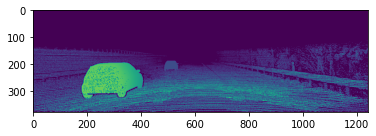

In [38]:
plt.imshow(i1)
plt.show()
plt.imshow(i2)
plt.show()

In [12]:
## Change this 
def depth_read(filename):
    # loads depth map D from png file
    # and returns it as a numpy array,
    # for details see readme.txt

    depth_png = np.array(Image.open(filename), dtype=np.uint16)
    # make sure we have a proper 16bit depth map here.. not 8bit!
    assert(np.max(depth_png) > 255)

    depth = depth_png / 255.
    depth[depth_png == 0] = -1.
    return depth


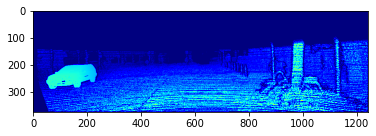

In [21]:
img_path = "Datasets/stereo/data_scene_flow/training/disp_noc_0/000001_10.png"

img = depth_read(img_path)
plt.imshow(img, plt.cm.jet)
plt.show()

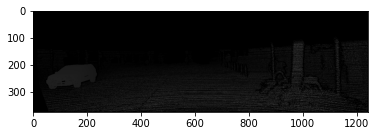

In [22]:
img = cv2.imread(img_path)
plt.imshow(img, cmap=plt.cm.jet)
plt.show()

In [16]:
img.shape

(375, 1242, 3)

In [19]:
def normalize(img_path):
    img = cv2.imread(img_path)
    return img + (255 - img.max())
    

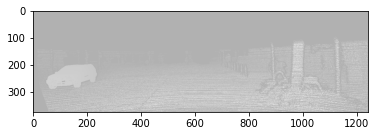

In [20]:
plt.imshow(normalize(img_path))